# Prédiction du Prix des Ordinateurs Portables



## Description du Projet

- Dans ce projet, un modèle de machine learning supervisé a été créé pour prédire le prix estimé d’un ordinateur portable en fonction de ses spécifications.
- Ce modèle a été entraîné sur un jeu de données provenant de [Kaggle](https://www.kaggle.com/datasets/aggle6666/laptop-price-prediction-dataset).
- Le jeu de données contient les spécifications des ordinateurs portables ainsi que leurs prix correspondants.
- Voici une description de ce jeu de données :

## Description du Jeu de Données

| Nom de la colonne | Description                                                 |
| :---------------- | :---------------------------------------------------------- |
| Company           | Noms des fabricants d'ordinateurs portables                 |
| TypeName          | Type d'ordinateur portable (Notebook, Ultrabook, 2-en-1, etc.) |
| Inches            | Taille de l'écran de l'ordinateur portable en pouces        |
| ScreenResolution  | Résolution de l'écran avec le type d'affichage              |
| Cpu               | Nom du processeur avec la vitesse en GHz                    |
| Ram               | Taille de la RAM de l'ordinateur portable en GB             |
| Memory            | Type de mémoire et taille en GB et TB                       |
| Gpu               | Nom du GPU avec sa série                                    |
| OpSys             | Système d'exploitation de l'ordinateur portable            |
| Weight            | Poids de l'ordinateur portable en kg                        |
| Price             | Prix de l'ordinateur portable en euro      |

- La bibliothèque **Scikit-learn** a été utilisée pour construire le modèle de machine learning.
- **Streamlit** a été utilisé pour créer une application web qui permet aux utilisateurs de sélectionner les spécifications de l'ordinateur portable et d'obtenir un prix estimé.


### Chargement des packages

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

### Importer les jeux de données

In [148]:
data=pd.read_csv('laptop_data_V3.csv')


In [149]:
data.sample(3)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1012,1012,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.48kg,931.86720
339,339,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,2kg,669.74292
324,324,Acer,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg,386.22672


In [150]:
data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [151]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## Prétraitement des données

### 1. Suppression de la colonne «Unnamed: 0 ».

In [152]:
data.drop(columns='Unnamed: 0', inplace=True)
data.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,2329.668000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1487.148696
1045,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD + 500GB HDD,Intel HD Graphics 520,Windows 10,1.84kg,1232.725507


### Vérification des « valeurs nulles » et des « lignes en double » dans l'ensemble de données.

In [153]:
def count_percent(data):
    data_columns = pd.DataFrame({'Count Missing': data.isnull().sum(),
                                'Percent Missing': data.isnull().sum()*100/data.shape[0],
                                'Count Duplicate Rows': data.duplicated().sum(),
                                'Percent Duplicate Rows': data.duplicated().sum()*100/data.shape[0]
                                })
    return data_columns
count_percent(data) 

,Count Missing,Percent Missing,Count Duplicate Rows,Percent Duplicate Rows
Company,0,0.0,29,2.225633
TypeName,0,0.0,29,2.225633
Inches,0,0.0,29,2.225633
ScreenResolution,0,0.0,29,2.225633
Cpu,0,0.0,29,2.225633
Ram,0,0.0,29,2.225633
Memory,0,0.0,29,2.225633
Gpu,0,0.0,29,2.225633
OpSys,0,0.0,29,2.225633
Weight,0,0.0,29,2.225633


In [154]:
print(data.shape)


(1303, 11)


In [155]:
# supprimer les lignes en double
print("Duplicate Rows: ",data.duplicated().sum())
print(data.shape)
count_percent(data)

Duplicate Rows:  29
(1303, 11)


,Count Missing,Percent Missing,Count Duplicate Rows,Percent Duplicate Rows
Company,0,0.0,29,2.225633
TypeName,0,0.0,29,2.225633
Inches,0,0.0,29,2.225633
ScreenResolution,0,0.0,29,2.225633
Cpu,0,0.0,29,2.225633
Ram,0,0.0,29,2.225633
Memory,0,0.0,29,2.225633
Gpu,0,0.0,29,2.225633
OpSys,0,0.0,29,2.225633
Weight,0,0.0,29,2.225633


- Unnamed: 0 a été supprimée.
- Nous avons trouvé 29 lignes en double et les avons supprimées.
- Il n'y a désormais plus de « lignes en double » ni de « valeurs nulles » dans l'ensemble de données.

In [156]:
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

## 2. Prétraitement du champ 'Company' :

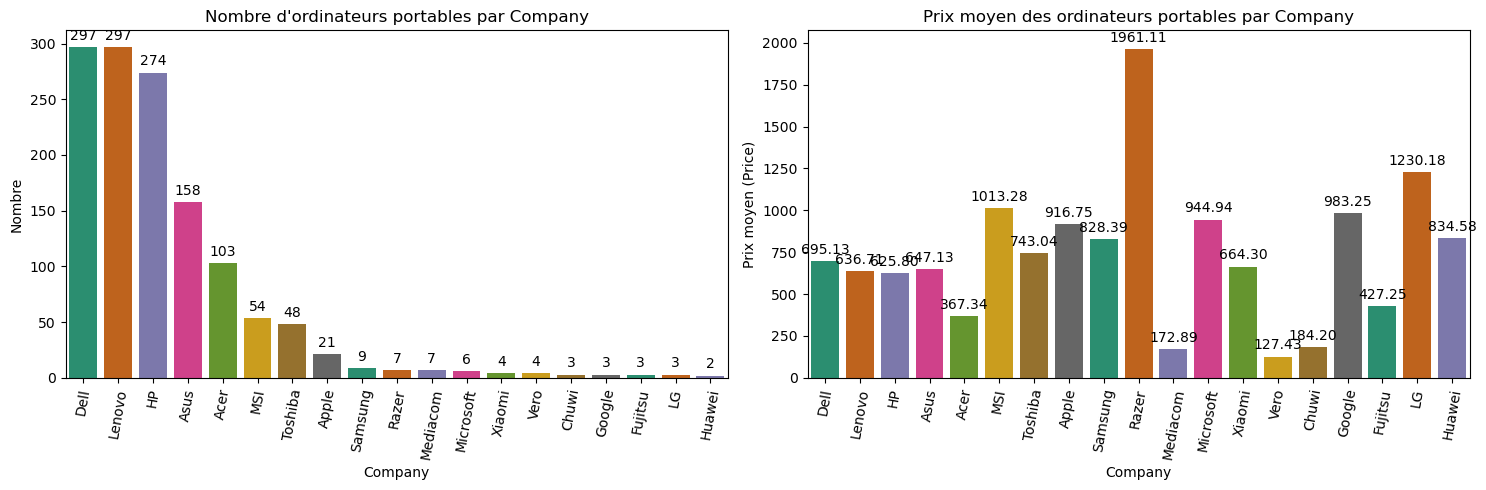

In [157]:
def count_n_price_plot(col1, col2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))  
    
    countplot = sns.countplot(
        x=col1,
        data=data,
        palette='Dark2',
        order=data[col1].value_counts().index,
        ax=axes[0],  
    )
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)
    for container in countplot.containers:
        countplot.bar_label(container, label_type='edge', padding=3)
    axes[0].set_title(f'Nombre d\'ordinateurs portables par {col1}')
    axes[0].set_ylabel("Nombre")
    
    barplot = sns.barplot(
        x=col1,
        y=col2,
        data=data,
        palette='Dark2',
        order=data[col1].value_counts().index,
        ci=False,
        ax=axes[1],  
    )
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=80)
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.2f', padding=3)  
    axes[1].set_title(f'Prix moyen des ordinateurs portables par {col1}')
    axes[1].set_ylabel(f"Prix moyen ({col2})")
    
    plt.tight_layout()
    plt.show()

count_n_price_plot('Company', 'Price')


## 3. Prétraitement du champ 'TypeName' :

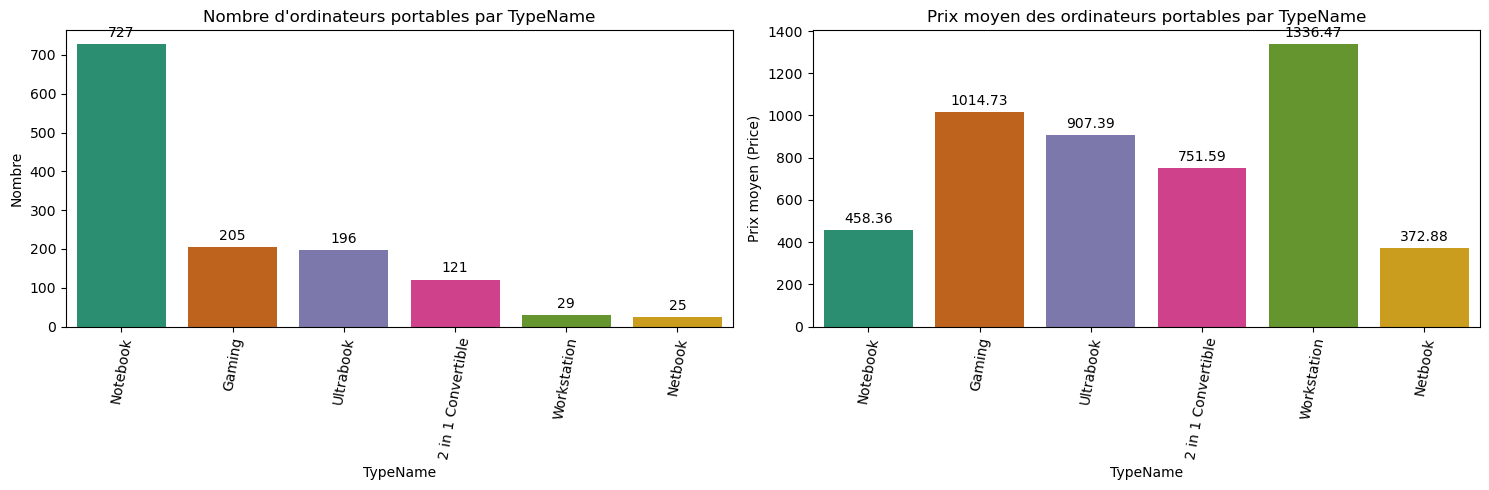

In [158]:
count_n_price_plot('TypeName','Price')


## 4. Prétraitement du champ 'Inches' :

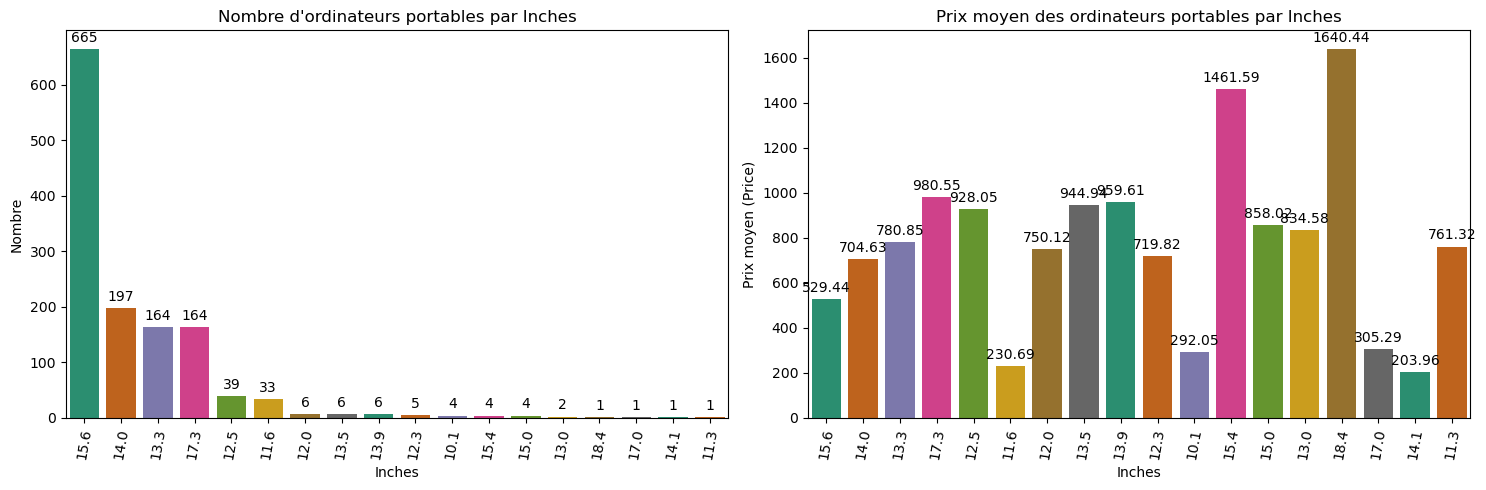

In [159]:
count_n_price_plot('Inches','Price')


## 5. Preprocessing on 'ScreenResolution' field:


In [160]:
data['ScreenResolution'].value_counts()


Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

- IPS et écran tactile (Touchscreen) sont des technologies d'affichage, à séparer pour une meilleure compréhension.

In [161]:
data['Touchscreen'] = data['ScreenResolution'].apply(
    lambda x: 1 if 'Touchscreen' in x else 0)

In [162]:
data.sample(5)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
991,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.1kg,292.453920,0
330,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7kg,702.709920,0
720,Lenovo,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6500U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.17kg,988.505971,0
1252,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6100U 2.3GHz,6GB,128GB SSD,Nvidia GeForce 920MX,Windows 10,2.4kg,333.479520,0
341,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,12GB,2TB HDD,AMD Radeon 530,Windows 10,2.2kg,526.885920,0


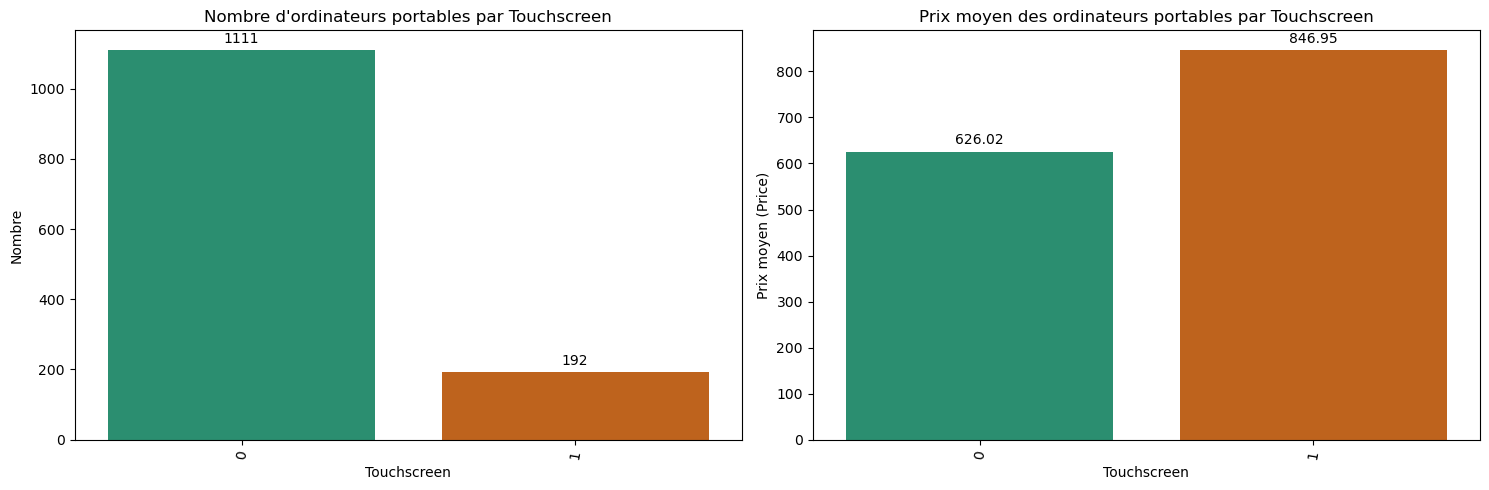

In [163]:
count_n_price_plot('Touchscreen','Price')


In [164]:
data['Ips'] = data['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)


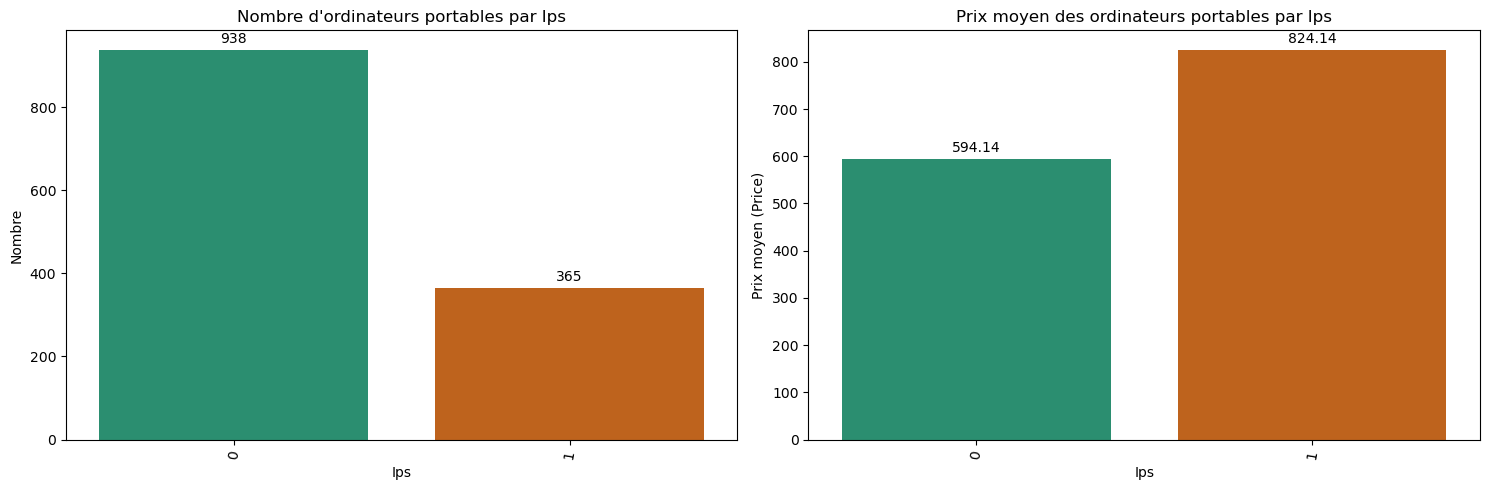

In [165]:
count_n_price_plot('Ips','Price')


- La colonne 'ScreenResolution' contient des informations textuelles sur la résolution de l'écran,
- souvent sous forme de chaînes telles que "1920x1080" ou "2560x1440".
- Pour rendre ces données plus exploitables, on extrait la résolution horizontale (X_res) et verticale (Y_res) comme deux colonnes distinctes.

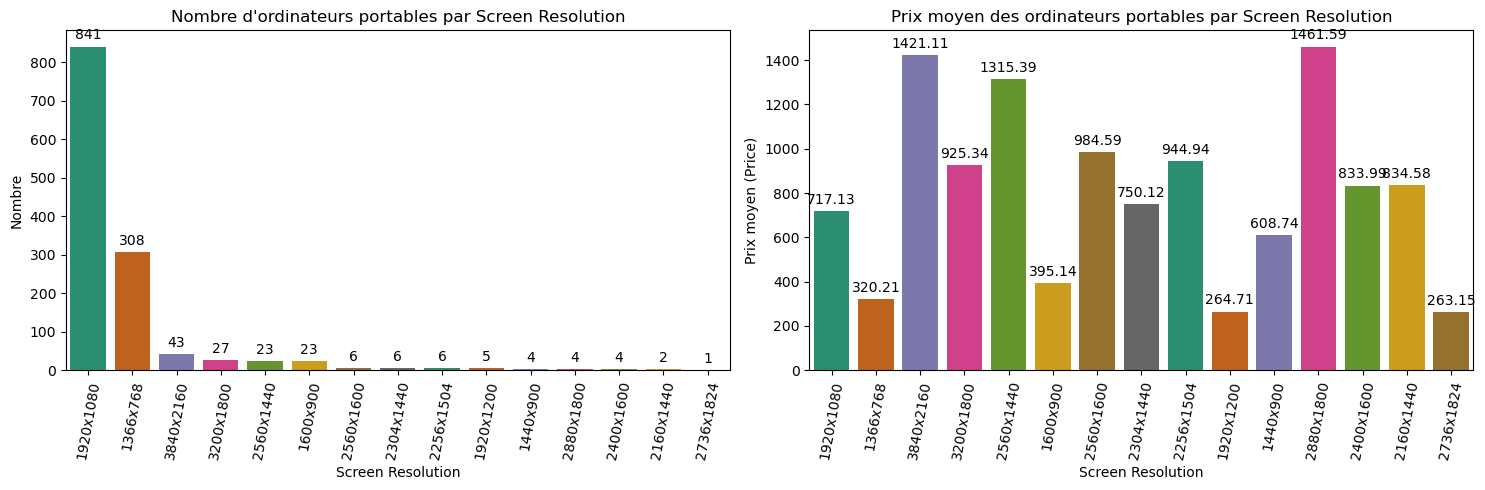

In [166]:
new = data['ScreenResolution'].str.split('x',n=1,expand=True)
new[0] = new[0].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
data['Screen Resolution'] = (new[0]+'x'+new[1])
data['X_res'] = new[0]
data['Y_res'] = new[1]
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

count_n_price_plot('Screen Resolution','Price')
# count_n_price_plot('X_res','Price')
# Drop unnecessary columns
data.drop(columns=['ScreenResolution'], inplace=True)


## 6. Prétraitement du champ 'Cpu' :


In [167]:
data['Cpu'].value_counts().sample(10)


AMD A10-Series A10-9620P 2.5GHz           2
Intel Core i7 6700HQ 2.6GHz              43
AMD A6-Series 7310 2GHz                   1
Intel Celeron Quad Core N3710 1.6GHz      1
Intel Core i5 1.8GHz                      2
Intel Core i7 6500U 2.50GHz               2
Intel Core i5 7Y57 1.2GHz                 2
Intel Core i5 7200U 2.5GHz              190
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Core i7 7500U 2.5GHz                1
Name: Cpu, dtype: int64

### Création des catégories de processeurs :

- Intel Core i3
- Intel Core i5
- Intel Core i7
- Puces AMD
- Autres (Intel Celeron, Pentium, Atom, Xeon, etc.)

In [168]:
# Divisons le champ 'Cpu' et prenons uniquement les trois premiers mots.
data['CPU Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
data['CPU Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [169]:
def fetch_processor1(text):
    if text.split()[0] == 'AMD':
        return (text.split()[0]+" "+text.split()[1])
    else:
        return text

data['CPU Name'] = data['CPU Name'].apply(fetch_processor1)
data['CPU Name'].value_counts()

Intel Core i7             527
Intel Core i5             423
Intel Core i3             136
Intel Celeron Dual         80
Intel Pentium Quad         27
Intel Core M               19
AMD A9-Series              17
AMD A6-Series              11
AMD E-Series                9
Intel Celeron Quad          8
AMD A12-Series              8
AMD A10-Series              6
Intel Atom x5-Z8350         5
AMD A8-Series               4
Intel Atom x5-Z8550         4
AMD Ryzen                   4
Intel Pentium Dual          3
Intel Xeon E3-1505M         2
AMD FX                      2
Intel Xeon E3-1535M         2
Intel Atom X5-Z8350         2
Intel Atom x5-Z8300         1
Intel Atom Z8350            1
AMD A4-Series               1
Samsung Cortex A72&A53      1
Name: CPU Name, dtype: int64

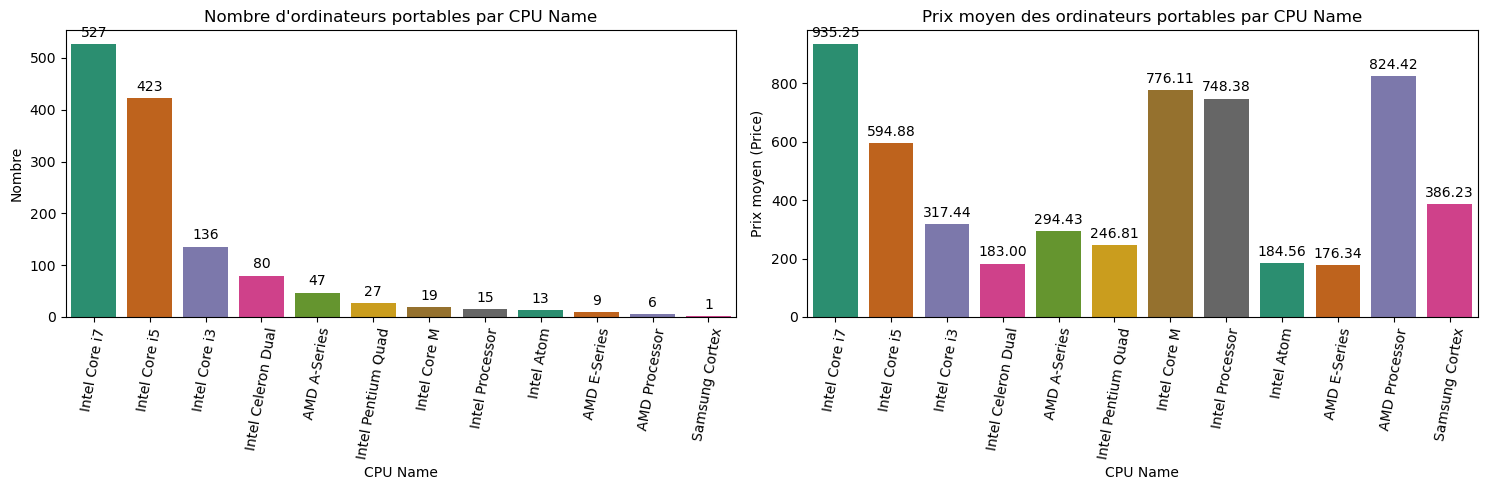

In [170]:
#Fonction pour renvoyer le processeur CPU spécifique ou le plus fréquent.
def fetch_processor2(text):
    if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3', 'Intel Celeron Dual', 'Intel Pentium Quad',
                'Intel Core M',]:
        return text
    elif text in ['AMD A9-Series','AMD A6-Series','AMD A12-Series','AMD A10-Series','AMD A8-Series','AMD A4-Series']:
        return 'AMD A-Series'
    else:
        if text.split()[1] == 'Atom':
            return 'Intel Atom'
        elif text.split()[1] == 'E-Series':
            return 'AMD E-Series'
        elif text.split()[0] == 'Intel':
            return 'Intel Processor'
        elif text.split()[0] == 'AMD':
            return 'AMD Processor'    
        else:
            return (text.split()[0]+" "+text.split()[1])

data['CPU Name'] = data['CPU Name'].apply(fetch_processor2)

count_n_price_plot('CPU Name','Price')

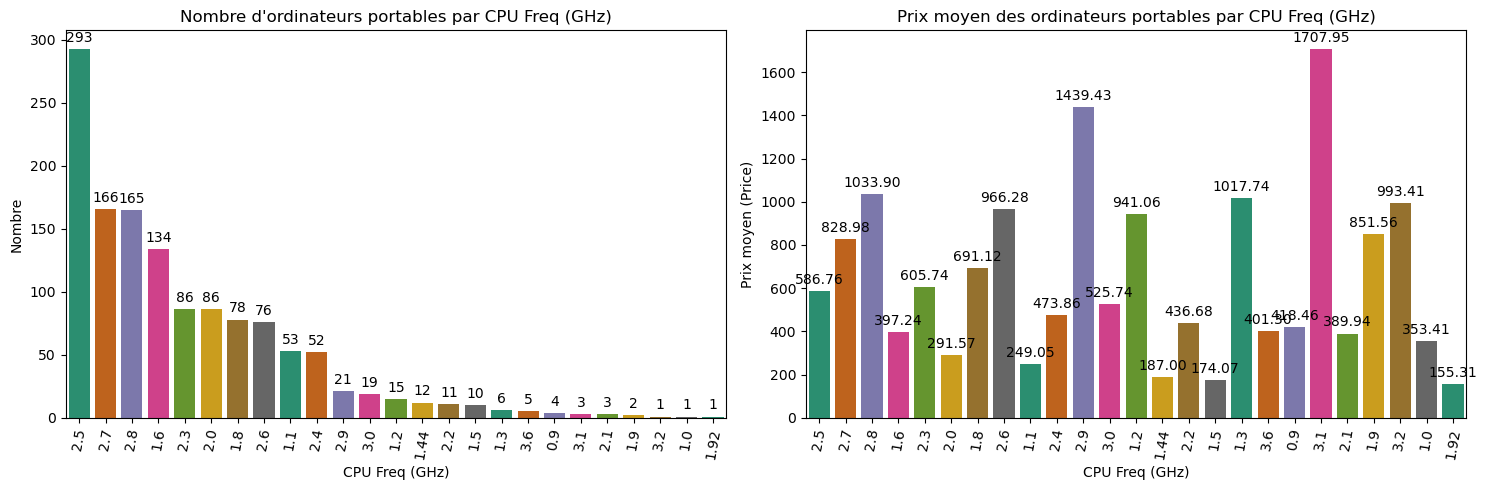

In [171]:
# Nouvelle colonne "CPU" fréquence 
# Nouvelle colonne
new2 = data['Cpu'].str.extract(r'(\d+\.\d+GHz|\d+GHz)')
data['CPU Freq (GHz)'] = new2[0].str.replace('GHz','').astype(float)
count_n_price_plot('CPU Freq (GHz)','Price')

data.drop(columns='Cpu',inplace=True)

In [172]:
data.sample(3)


,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Screen Resolution,X_res,Y_res,CPU Name,CPU Freq (GHz)
742,Toshiba,Notebook,14.0,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.25kg,899.63280,1,1,1920x1080,1920,1080,Intel Core i5,2.5
1031,Acer,Notebook,15.6,6GB,1TB HDD,AMD Radeon R5,Windows 10,2.1kg,239.70672,0,0,1366x768,1366,768,AMD A-Series,3.0
884,Dell,Notebook,15.6,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,216.26352,0,0,1366x768,1366,768,Intel Pentium Quad,1.6


## 7. Preprocessing on 'Ram' field.


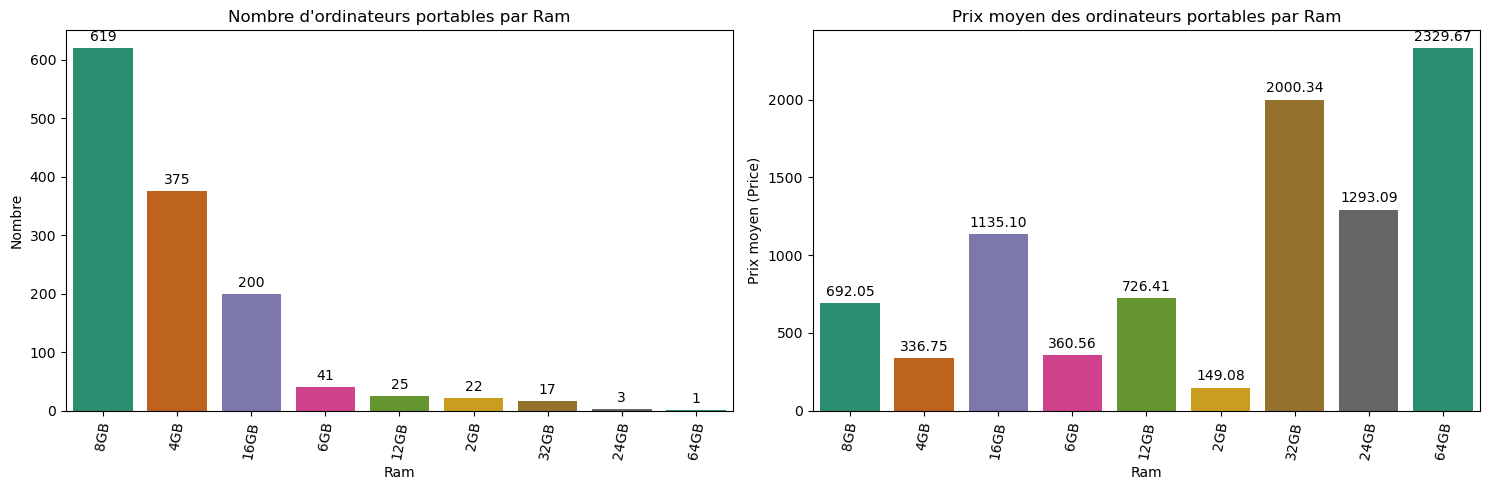

In [173]:
count_n_price_plot('Ram','Price')


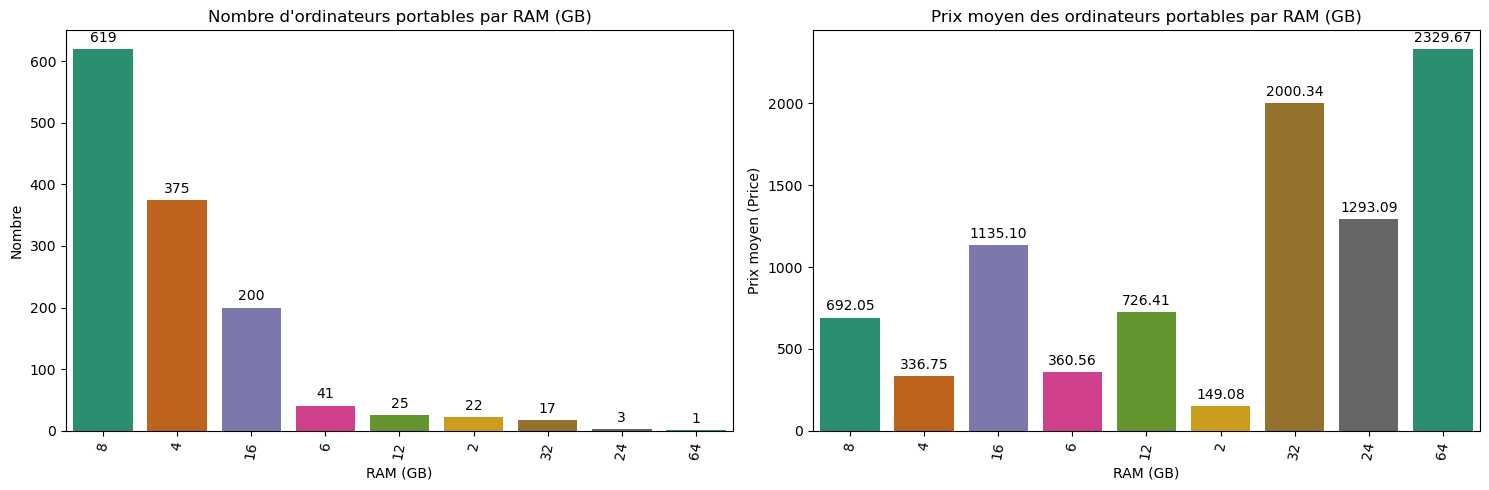

In [174]:
data['RAM (GB)'] = data['Ram'].str.replace("GB", "").astype(int)  
count_n_price_plot('RAM (GB)','Price')
data.drop(columns=['Ram'],inplace=True)

## 8. Preprocessing on 'Memory' field.


In [175]:
data['Memory'].value_counts().sample(20)


32GB Flash Storage                38
64GB Flash Storage +  1TB HDD      1
32GB HDD                           1
508GB Hybrid                       1
128GB SSD +  1TB HDD              94
256GB Flash Storage                8
1.0TB Hybrid                       9
512GB SSD +  1.0TB Hybrid          1
256GB SSD +  1TB HDD              73
1TB SSD +  1TB HDD                 2
512GB SSD                        118
512GB SSD +  1TB HDD              14
256GB SSD +  500GB HDD             2
16GB SSD                           3
512GB SSD +  512GB SSD             1
1TB SSD                           14
32GB SSD                           6
128GB SSD +  2TB HDD               2
1TB HDD                          223
512GB SSD +  2TB HDD               3
Name: Memory, dtype: int64

- Les ordinateurs portables peuvent avoir un ou plusieurs types de mémoire.
- Il existe deux unités de mémoire : GB et TB. Nous allons convertir les TB en 1000 GB. Ainsi, le GB deviendra l'unité de mémoire commune pour tous les ordinateurs portables.
- Après la conversion des unités, nous supprimerons "GB" car nous souhaitons obtenir une colonne avec des données de type entier (int).

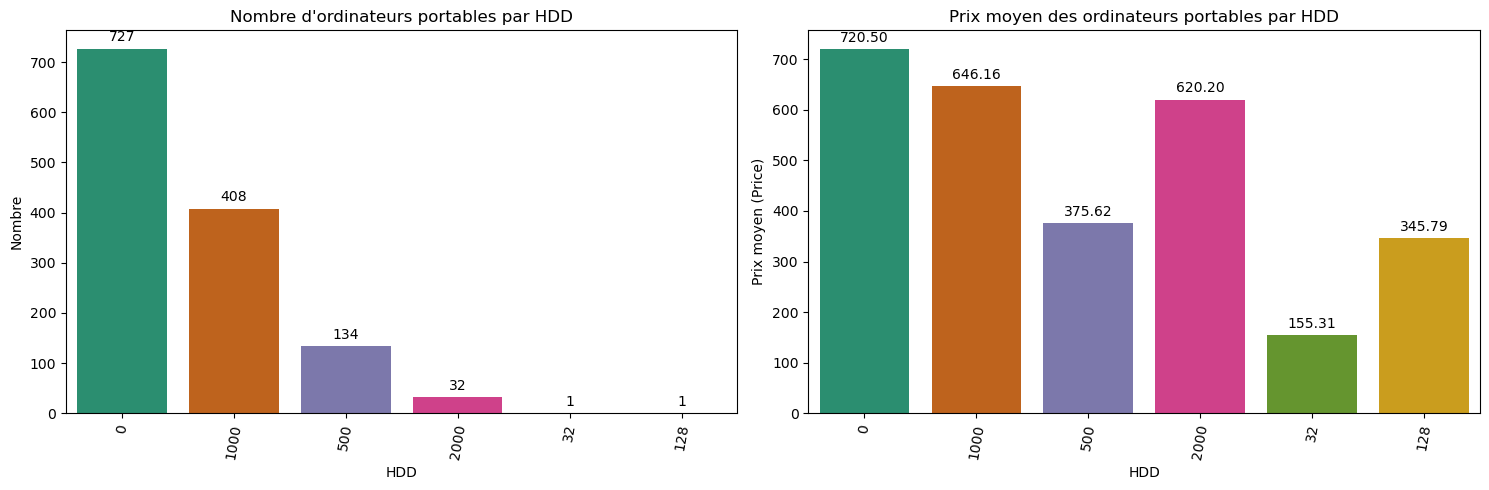

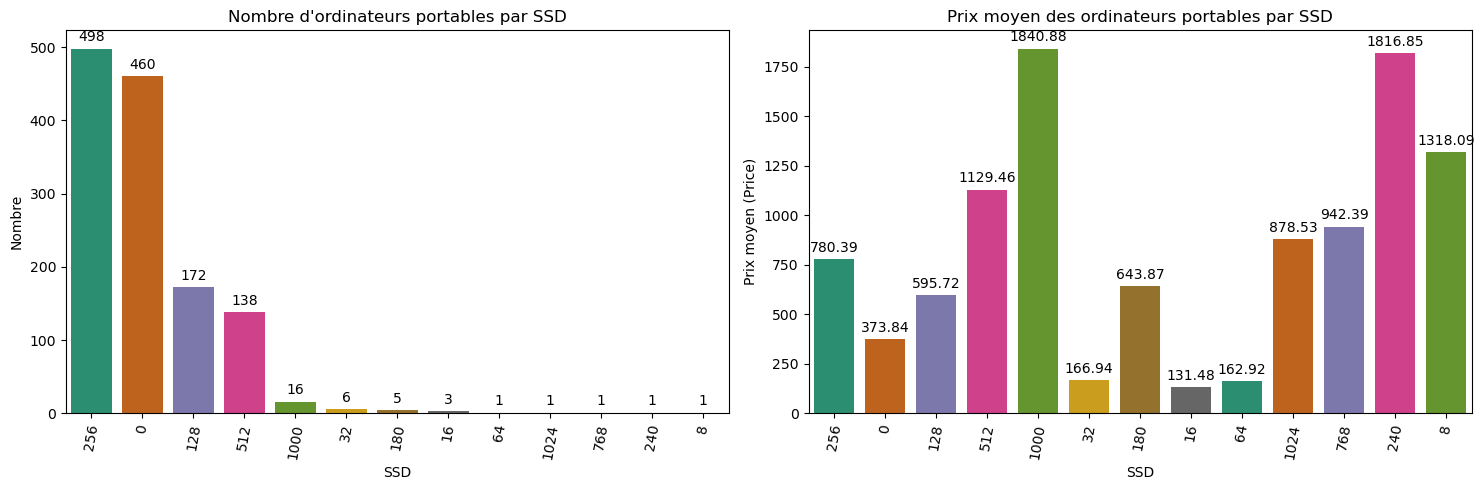

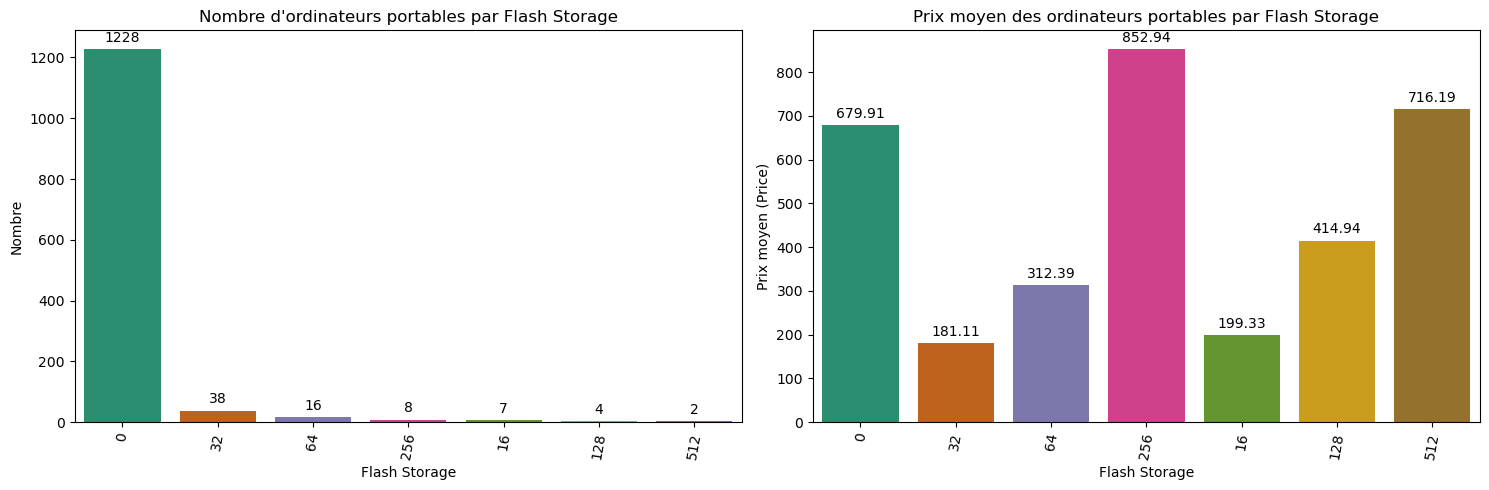

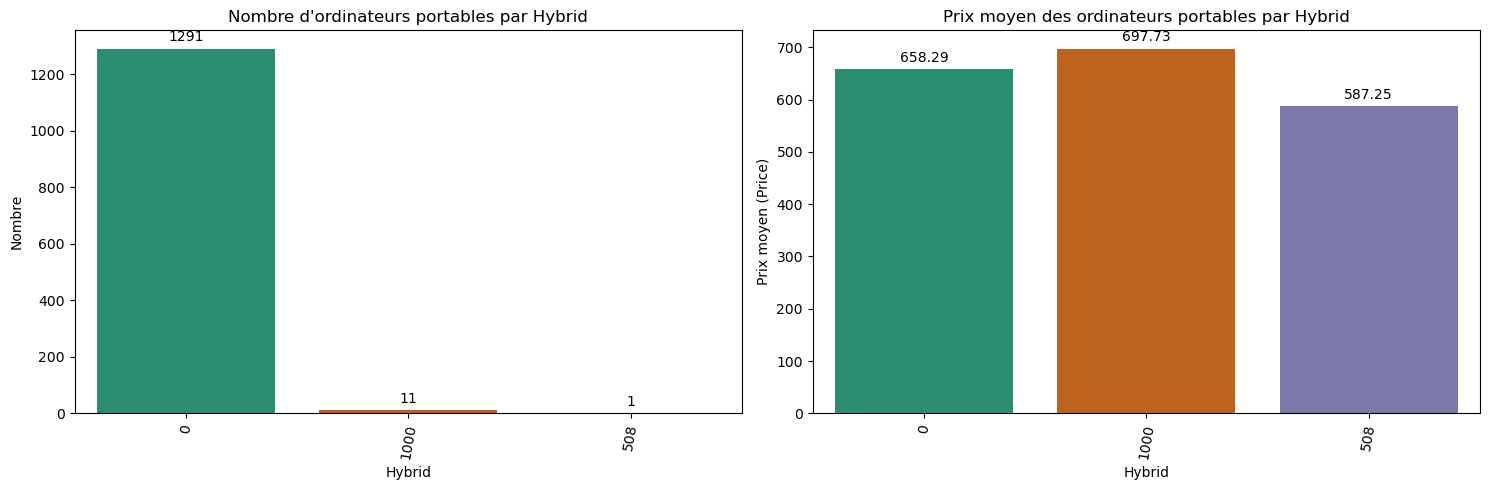

In [176]:
# Remplacer '1.0TB' par '1TB'
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)

# Remplacer 'GB' par '' par exemple, '512GB' devient '512'
data['Memory'] = data['Memory'].str.replace('GB', '')  

# Remplacer 'TB' par '000' par exemple, '1TB' devient '1000'
data['Memory'] = data['Memory'].str.replace('TB', '000')

# Séparer les données contenant deux types de mémoire, par exemple, '512 SSD + 1000 HDD' devient ['512 SSD', '1000 HDD']
new3 = data['Memory'].str.split('+', n=1, expand=True)  

# Nommer le premier index de la liste 'first' et le deuxième index 'second'
data['first'] = new3[0]     
data['second'] = new3[1]

data['second'].fillna("0", inplace=True) 

# Appliquer une étiquette binaire pour chaque type de mémoire dans 'first'
data['Layer1HDD'] = data['first'].apply(lambda x: 1 if "HDD" in x else 0)
data['Layer1SSD'] = data['first'].apply(lambda x: 1 if "SSD" in x else 0)
data['Layer1Hybrid'] = data['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['Layer1Flash_Storage'] = data['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Appliquer une étiquette binaire pour chaque type de mémoire dans 'second'
data['Layer2HDD'] = data['second'].apply(lambda x: 1 if "HDD" in x else 0)
data['Layer2SSD'] = data['second'].apply(lambda x: 1 if "SSD" in x else 0)
data['Layer2Hybrid'] = data['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['Layer2Flash_Storage'] = data['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Supprimer les caractères non numériques et convertir en entier dans 'first'
data['first'] = data['first'].str.replace(r'\D', '')  
data['first'] = data['first'].astype(int)

# Supprimer les caractères non numériques et convertir en entier dans 'second'
data['second'] = data['second'].str.replace(r'\D', '')
data['second'] = data['second'].astype(int)

# Calculer la capacité totale de chaque type de mémoire
data["HDD"] = (data["first"] * data["Layer1HDD"] + data["second"] * data["Layer2HDD"])  
data["SSD"] = (data["first"] * data["Layer1SSD"] + data["second"] * data["Layer2SSD"])  
data["Flash Storage"] = (data["first"] * data["Layer1Flash_Storage"] + data["second"] * data["Layer2Flash_Storage"])
data["Hybrid"] = (data["first"] * data["Layer1Hybrid"] + data["second"] * data["Layer2Hybrid"])

# Supprimer les colonnes temporaires
data.drop(columns=['Memory', 'first', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
                   'second', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)

# Tracer un graphique à barres pour comparer la capacité de chaque type de mémoire (HDD, SSD, Hybrid, Flash Storage) avec le prix
count_n_price_plot('HDD', 'Price')
count_n_price_plot('SSD', 'Price')
count_n_price_plot('Flash Storage', 'Price')
count_n_price_plot('Hybrid', 'Price')


In [177]:
# supprimer la colonne Hybrid ainsi que les données de ses lignes respectives.
data = data[(data['Hybrid'] != 1000)]
data = data[(data['Hybrid'] != 508)]
data.drop(columns='Hybrid',inplace=True)
data= data.reset_index(drop=True)

## 9. Prétraitement sur le champ 'GPU' 


In [178]:
data['Gpu'].value_counts()


Intel HD Graphics 620      281
Intel HD Graphics 520      183
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: Gpu, Length: 109, dtype: int64

In [179]:
data['Gpu'] = data['Gpu'].apply(lambda x: x.split()[0])


In [180]:
data.sample(5)


,Company,TypeName,Inches,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Screen Resolution,X_res,Y_res,CPU Name,CPU Freq (GHz),RAM (GB),HDD,SSD,Flash Storage
1004,HP,Notebook,14.0,Intel,Windows 10,1.95kg,706.22640,0,0,1920x1080,1920,1080,Intel Core i5,2.5,4,0,256,0
180,Dell,Ultrabook,13.3,Intel,Windows 10,1.23kg,819.92592,0,0,1920x1080,1920,1080,Intel Core i5,1.6,8,0,256,0
986,Dell,Notebook,15.6,AMD,Windows 10,2.36kg,438.97392,0,0,1366x768,1366,768,Intel Core i7,2.7,8,1000,0,0
253,Acer,Notebook,17.3,Nvidia,Windows 10,3kg,411.42816,0,1,1920x1080,1920,1080,Intel Core i3,2.7,4,0,256,0
990,Lenovo,Notebook,15.6,Intel,No OS,1.9kg,158.60497,0,0,1366x768,1366,768,Intel Celeron Dual,1.1,4,0,128,0


In [181]:
data['Gpu'].value_counts()


Intel     720
Nvidia    396
AMD       174
ARM         1
Name: Gpu, dtype: int64

In [182]:
data = data[data['Gpu'] != 'ARM']


In [183]:
data['Gpu'].value_counts()


Intel     720
Nvidia    396
AMD       174
Name: Gpu, dtype: int64

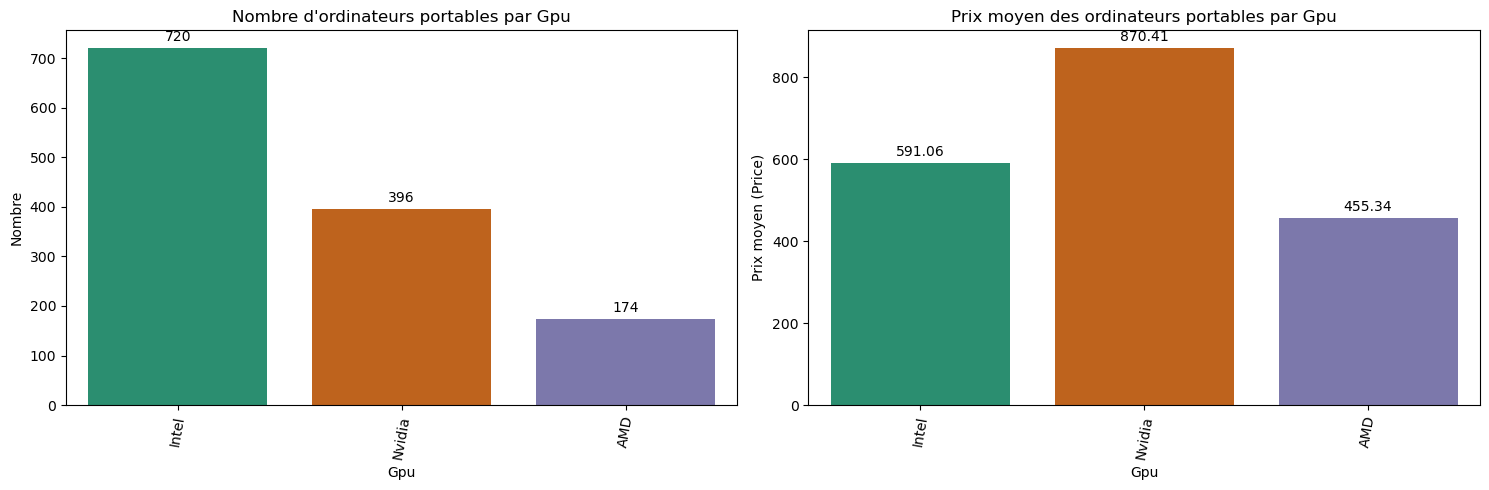

In [184]:
count_n_price_plot('Gpu','Price')


# 10. Prétraitement sur le champ 'OpSys' :


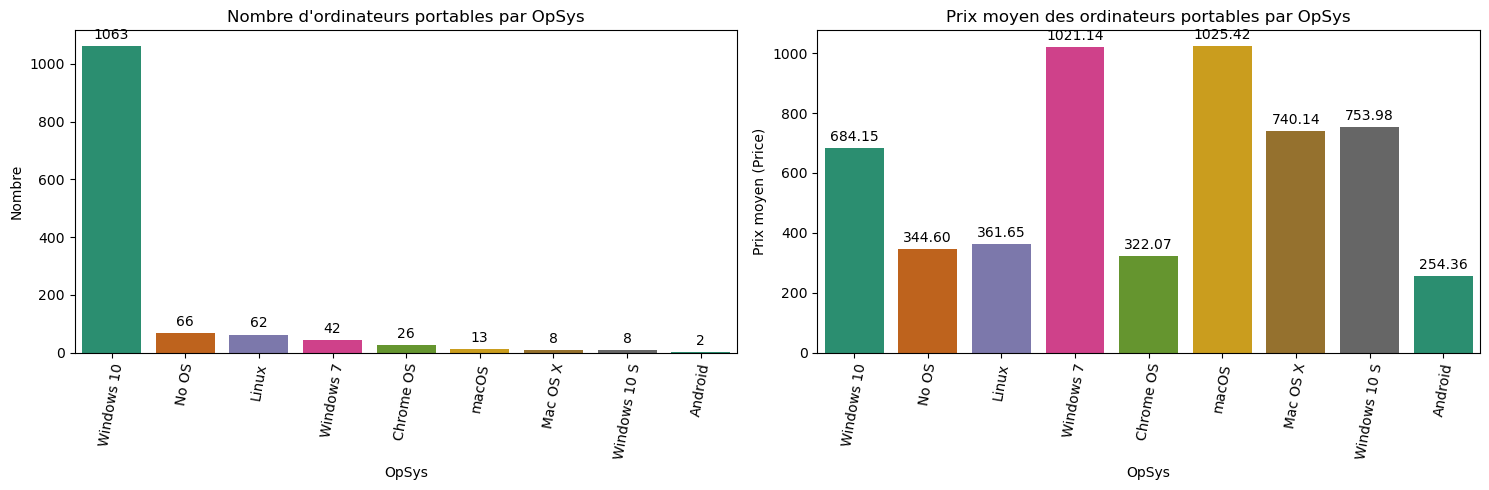

In [185]:
count_n_price_plot('OpSys','Price')


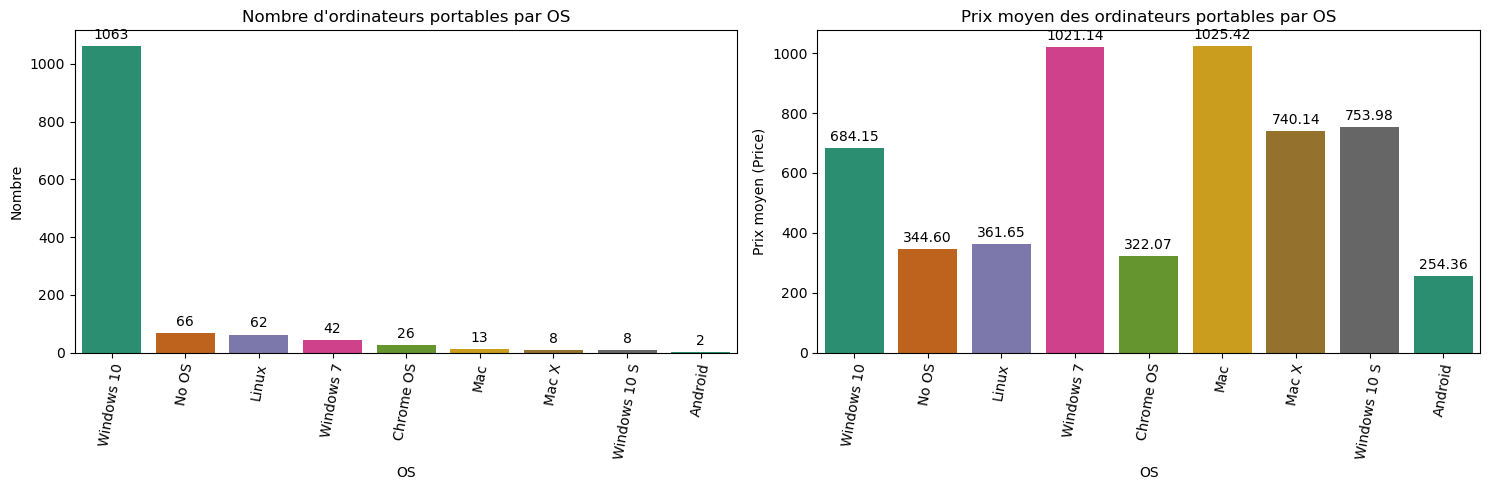

In [186]:
def fetch_os(x):
    if x == 'macOS':
        return 'Mac'
    elif x == 'Mac OS X':
        return 'Mac X'
    else:
        return x
data['OS'] = data['OpSys'].apply(fetch_os)

count_n_price_plot('OS','Price')
data.drop(columns='OpSys',inplace=True)

In [187]:
data.head()


,Company,TypeName,Inches,Gpu,Weight,Price,Touchscreen,Ips,Screen Resolution,X_res,Y_res,CPU Name,CPU Freq (GHz),RAM (GB),HDD,SSD,Flash Storage,OS
0,Apple,Ultrabook,13.3,Intel,1.37kg,785.165515,0,1,2560x1600,2560,1600,Intel Core i5,2.3,8,0,128,0,Mac
1,Apple,Ultrabook,13.3,Intel,1.34kg,526.850755,0,0,1440x900,1440,900,Intel Core i5,1.8,8,0,0,128,Mac
2,HP,Notebook,15.6,Intel,1.86kg,336.996000,0,0,1920x1080,1920,1080,Intel Core i5,2.5,8,0,256,0,No OS
3,Apple,Ultrabook,15.4,AMD,1.83kg,1487.148696,0,1,2880x1800,2880,1800,Intel Core i7,2.7,16,0,512,0,Mac
4,Apple,Ultrabook,13.3,Intel,1.37kg,1057.053888,0,1,2560x1600,2560,1600,Intel Core i5,3.1,8,0,256,0,Mac


## 11. Prétraitement sur le champ 'Weight'


In [188]:
data['Weight'].value_counts()


2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      36
         ... 
1.55kg      1
2.54kg      1
1.18kg      1
1.94kg      1
4.0kg       1
Name: Weight, Length: 178, dtype: int64

In [189]:
data['Weight (kg)'] = data['Weight'].str.replace("kg", "").astype(float) 
data.drop(columns='Weight',inplace=True)

In [190]:
# Placer la colonne 'Price' à la dernière position
data['Price_New'] = data['Price']
data.drop(columns='Price',inplace=True)
data['Price'] = data['Price_New']
data.drop(columns='Price_New',inplace=True)

## 12. Prétraitement terminé


In [191]:
data.head(50)

data.to_csv("laptop_data_preprocessedlolo.csv", index=False)
print("Le fichier CSV a été enregistré avec succès.")

# Charger le fichier pour voir s'il contient 'Unnamed: 0'
df = pd.read_csv("laptop_data_preprocessedlolo.csv")

# Vérifier les colonnes
print(df.columns)

Le fichier CSV a été enregistré avec succès.
Index(['Company', 'TypeName', 'Inches', 'Gpu', 'Touchscreen', 'Ips',
       'Screen Resolution', 'X_res', 'Y_res', 'CPU Name', 'CPU Freq (GHz)',
       'RAM (GB)', 'HDD', 'SSD', 'Flash Storage', 'OS', 'Weight (kg)',
       'Price'],
      dtype='object')


## save dataset csv 

In [192]:
data.to_csv("laptop_data_preprocessed.csv", index=False)
print("Le fichier CSV a été enregistré avec succès.")

df = pd.read_csv("laptop_data_preprocessedlolo.csv")

print(df.columns)

Le fichier CSV a été enregistré avec succès.
Index(['Company', 'TypeName', 'Inches', 'Gpu', 'Touchscreen', 'Ips',
       'Screen Resolution', 'X_res', 'Y_res', 'CPU Name', 'CPU Freq (GHz)',
       'RAM (GB)', 'HDD', 'SSD', 'Flash Storage', 'OS', 'Weight (kg)',
       'Price'],
      dtype='object')


In [193]:
df = pd.read_csv("laptop_data_preprocessed.csv")

df.sample(3)


,Company,TypeName,Inches,Gpu,Touchscreen,Ips,Screen Resolution,X_res,Y_res,CPU Name,CPU Freq (GHz),RAM (GB),HDD,SSD,Flash Storage,OS,Weight (kg),Price
652,MSI,Gaming,15.6,Nvidia,0,0,1920x1080,1920,1080,Intel Core i7,2.8,8,1000,128,0,Windows 10,2.20,698.490144
134,HP,Notebook,15.6,Intel,0,0,1366x768,1366,768,Intel Core i7,2.7,8,1000,0,0,Windows 10,2.05,350.475840
1137,HP,Workstation,15.6,Nvidia,0,1,1920x1080,1920,1080,Intel Core i7,2.6,8,0,256,0,Windows 7,2.59,1306.372320
